In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [152]:
plt.style.use('seaborn')

## Load Datasets

In [153]:
df_forestfires = pd.read_csv('forestfires.csv')

In [154]:
df_forestfires

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


Informasi Atribut:
1. X - koordinat spasial sumbu x dalam peta taman Montesinho: 1 hingga 9
2. Koordinat spasial sumbu Y - y dalam peta taman Montesinho: 2 hingga 9
3. bulan - bulan dalam setahun: 'jan' hingga 'dec'
4. hari - hari dalam seminggu: 'mon' hingga 'sun'
5. FFMC - Indeks FFMC dari sistem FWI: 18,7 hingga 96,20
6. DMC - Indeks DMC dari sistem FWI: 1,1 hingga 291,3
7. Indeks DC - DC dari sistem FWI: 7,9 hingga 860,6
8. ISI - Indeks ISI dari sistem FWI: 0,0 hingga 56,10
9. suhu - suhu dalam derajat Celcius: 2,2 hingga 33,30
10. RH - kelembaban relatif dalam %: 15,0 hingga 100
11. angin - kecepatan angin dalam km/jam: 0,40 hingga 9,40
12. hujan - hujan luar dalam mm/m2 : 0,0 hingga 6,4
13. areal – areal hutan yang terbakar (dalam ha): 0,00 sampai 1090,84 (variabel output ini sangat condong ke 0,0, sehingga dapat membuat akal untuk memodelkan dengan transformasi logaritma).

In [155]:
df_forestfires.dtypes

X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

In [156]:
df_forestfires.isnull().any()

X        False
Y        False
month    False
day      False
FFMC     False
DMC      False
DC       False
ISI      False
temp     False
RH       False
wind     False
rain     False
area     False
dtype: bool

In [157]:
df_forestfires.describe().T

,count,mean,std,min,25%,50%,75%,max
X,517.0,4.669246,2.313778,1.0,3.0,4.00,7.00,9.00
Y,517.0,4.299807,1.229900,2.0,4.0,4.00,5.00,9.00
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40


In [158]:
df_forestfires.describe().T

,count,mean,std,min,25%,50%,75%,max
X,517.0,4.669246,2.313778,1.0,3.0,4.00,7.00,9.00
Y,517.0,4.299807,1.229900,2.0,4.0,4.00,5.00,9.00
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40


In [159]:
cat_columns = df_forestfires.select_dtypes(include='object').columns.tolist()
num_columns = df_forestfires.select_dtypes(exclude='object').columns.tolist()

cat_columns,num_columns

(['month', 'day'],
 ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area'])

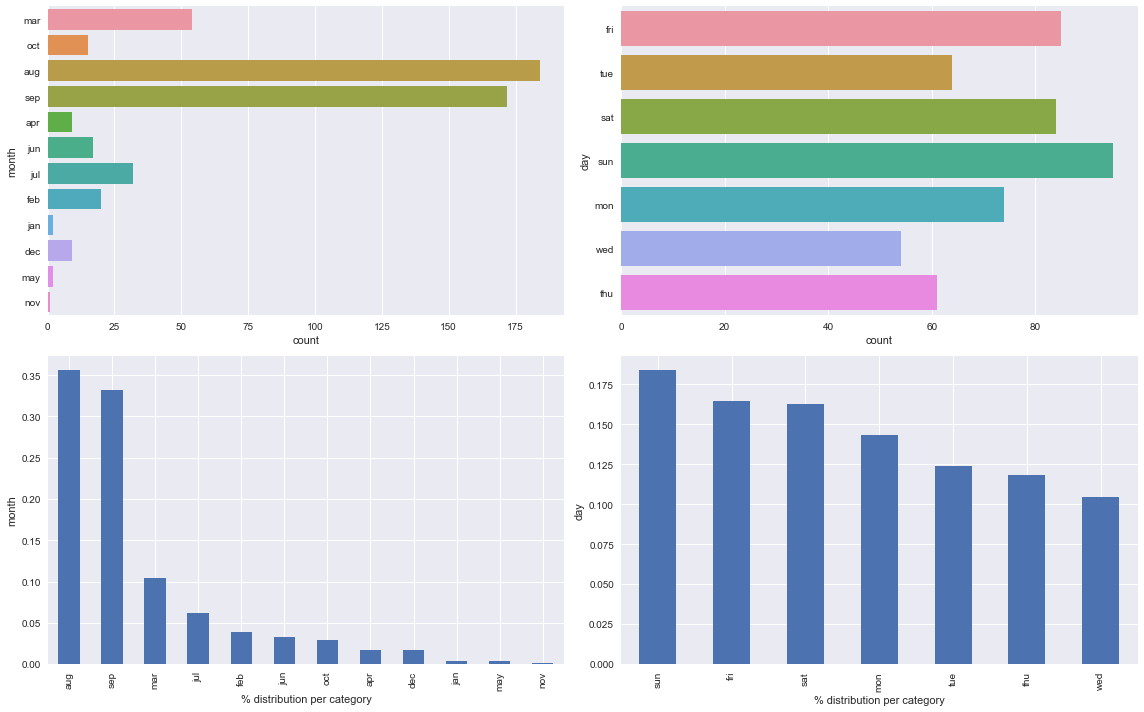

In [160]:
# analyzing categorical columns
plt.figure(figsize=(16,10))
for i,col in enumerate(cat_columns,1):
    plt.subplot(2,2,i)
    sns.countplot(data=df_forestfires,y=col)
    plt.subplot(2,2,i+2)
    df_forestfires[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()

c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\pandas\plotting\_matplotlib\tools.py:418: MatplotlibDeprecationWarning: 
The is_last_row function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_last_row() instead.
  if ax.is_last_row():
c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\pandas\plotting\_matplotlib\tools.py:418: MatplotlibDeprecationWarning: 
The is_last_row function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_last_row() instead.
  if ax.is_last_row():
c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\pandas\plotting\_matplotlib\tools.py:418: MatplotlibDeprecationWarning: 
The is_last_row function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_last_row() instead.
  if ax.is_last_row():
c:\users\asus\appdata\local\programs\python

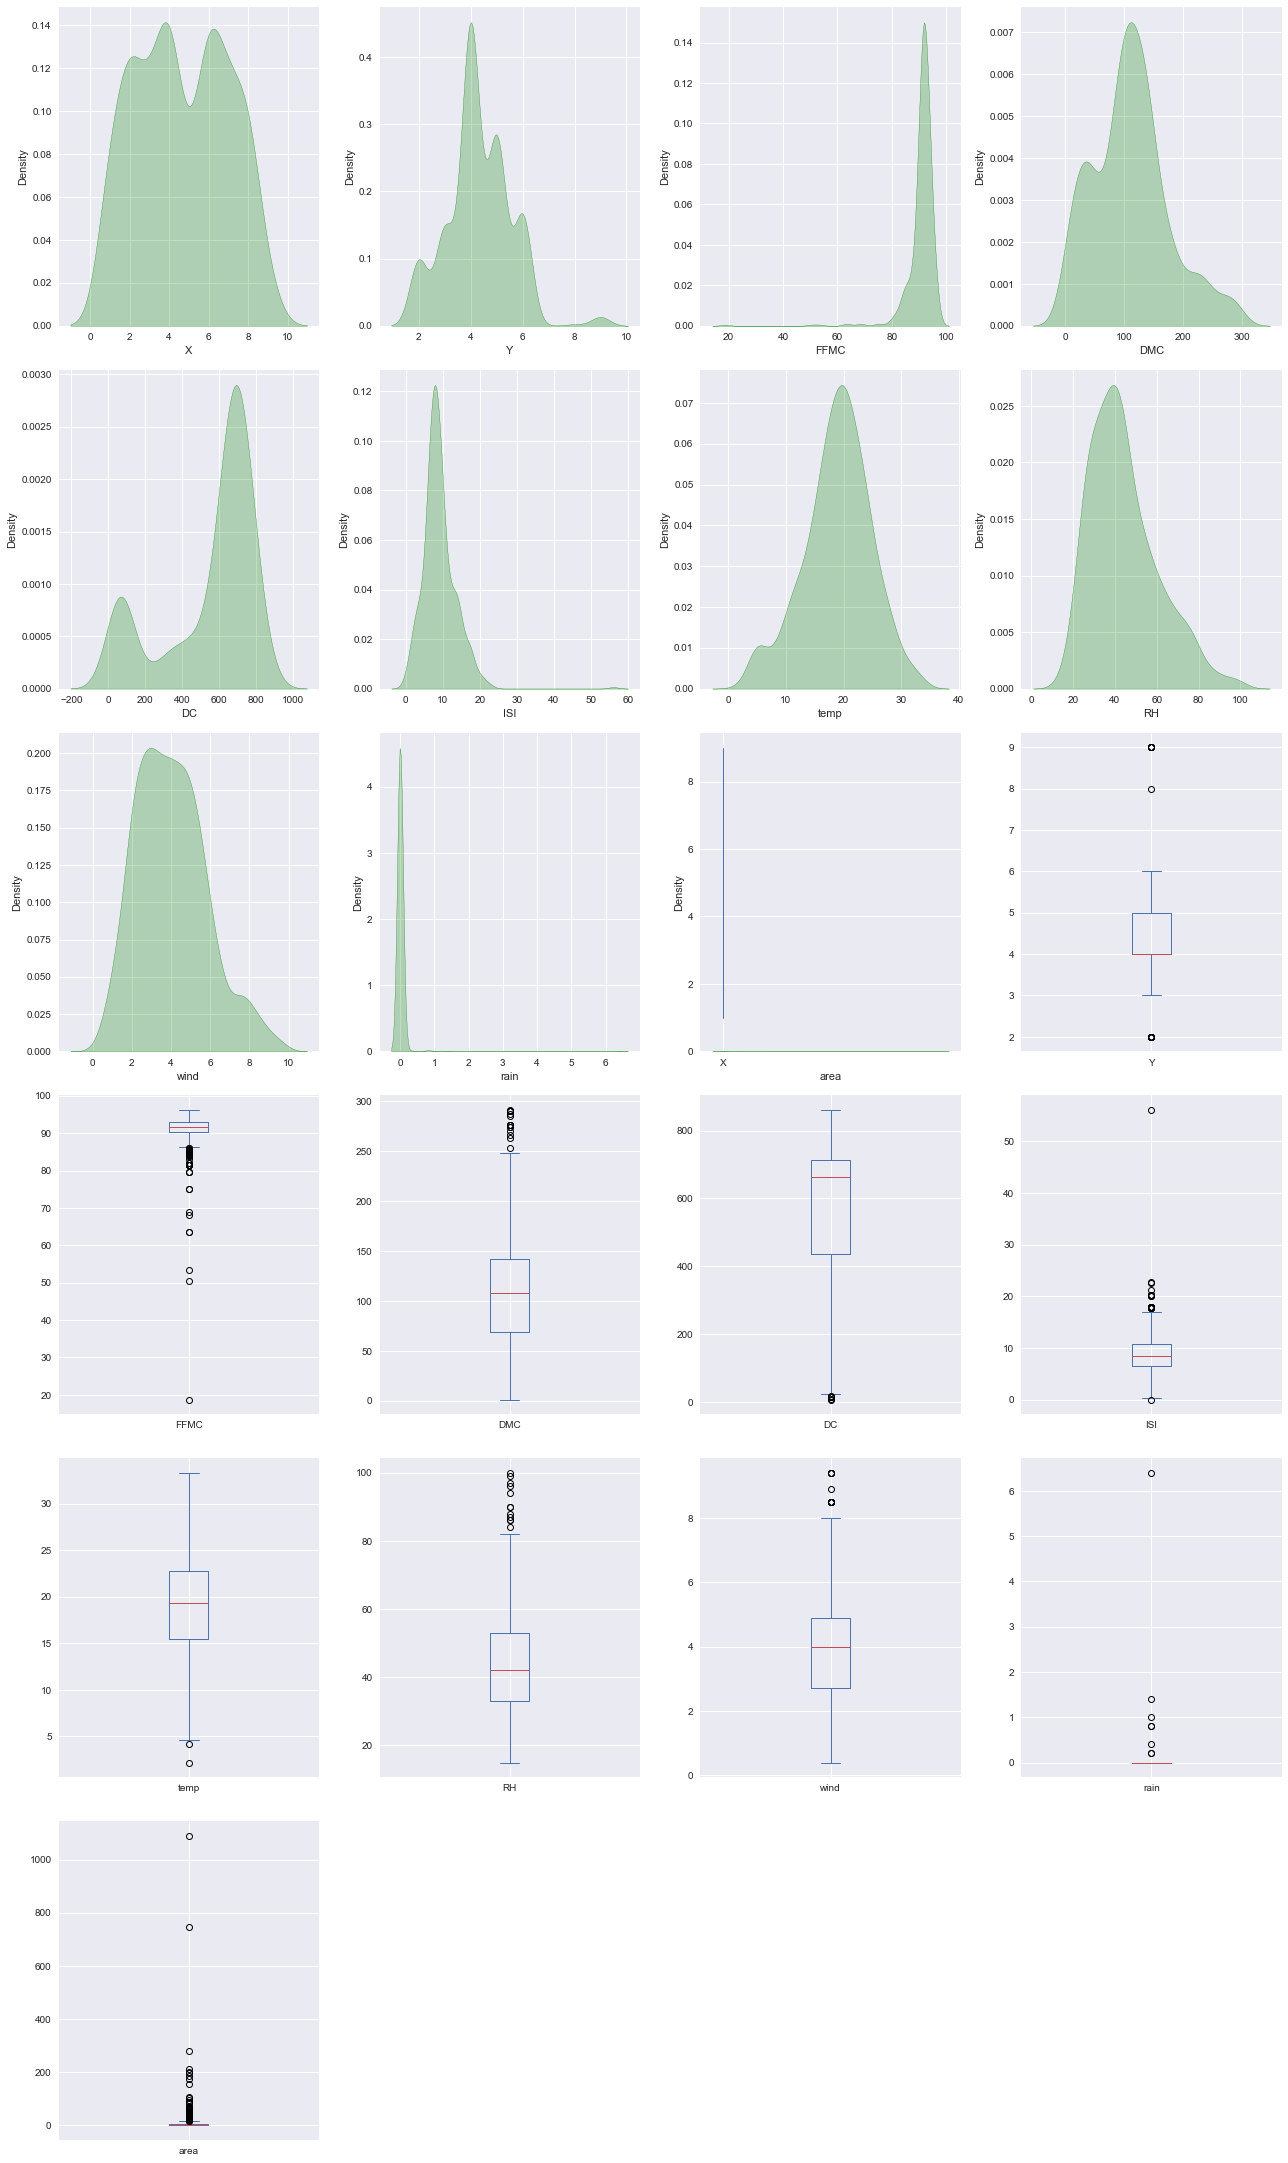

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
skewness,0.036246,0.417296,-6.575606,0.547498,-1.100445,2.536325,-0.331172,0.862904,0.571001,19.816344,12.846934
kurtosis,-1.172331,1.420553,67.066041,0.204822,-0.245244,21.458037,0.136166,0.438183,0.054324,421.295964,194.140721


In [161]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(df_forestfires[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    df_forestfires[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = df_forestfires[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

In [162]:
from scipy.stats import zscore

# Outlier points
y_outliers = df_forestfires[abs(zscore(df_forestfires['area'])) >= 3 ]
y_outliers

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
237,1,2,sep,tue,91.0,129.5,692.6,7.0,18.8,40,2.2,0.0,212.88
238,6,5,sep,sat,92.5,121.1,674.4,8.6,25.1,27,4.0,0.0,1090.84
415,8,6,aug,thu,94.8,222.4,698.6,13.9,27.5,27,4.9,0.0,746.28
479,7,4,jul,mon,89.2,103.9,431.6,6.4,22.6,57,4.9,0.0,278.53


In [163]:
print(df_forestfires['area'].describe(),'\n')
print(y_outliers)

count     517.000000
mean       12.847292
std        63.655818
min         0.000000
25%         0.000000
50%         0.520000
75%         6.570000
max      1090.840000
Name: area, dtype: float64 

     X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain     area
237  1  2   sep  tue  91.0  129.5  692.6   7.0  18.8  40   2.2   0.0   212.88
238  6  5   sep  sat  92.5  121.1  674.4   8.6  25.1  27   4.0   0.0  1090.84
415  8  6   aug  thu  94.8  222.4  698.6  13.9  27.5  27   4.9   0.0   746.28
479  7  4   jul  mon  89.2  103.9  431.6   6.4  22.6  57   4.9   0.0   278.53


In [164]:
# a categorical variable based on forest fire area damage
# No damage, low, moderate, high, very high
def area_cat(area):
    if area == 0.0:
        return "No damage"
    elif area <= 1:
        return "low"
    elif area <= 25:
        return "moderate"
    elif area <= 100:
        return "high"
    else:
        return "very high"

df_forestfires['damage_category'] = df_forestfires['area'].apply(area_cat)
df_forestfires.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,damage_category
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,No damage
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,No damage
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,No damage
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,No damage
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,No damage


In [165]:
cat_columns

['month', 'day']

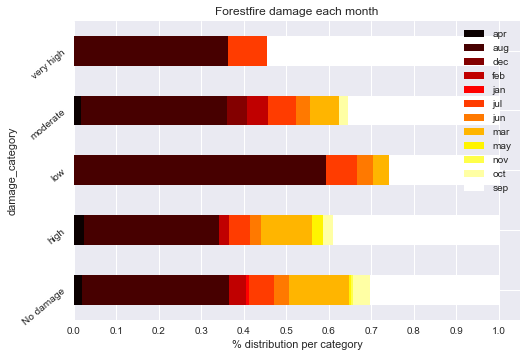

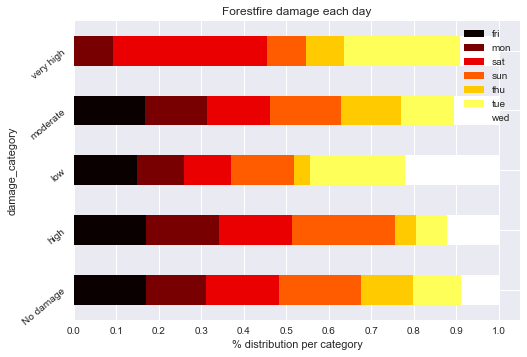

In [166]:
for col in cat_columns:
    cross = pd.crosstab(index=df_forestfires['damage_category'],columns=df_forestfires[col],normalize='index')
    cross.plot.barh(stacked=True,rot=40,cmap='hot')
    plt.xlabel('% distribution per category')
    plt.xticks(np.arange(0,1.1,0.1))
    plt.title("Forestfire damage each {}".format(col))
    plt.legend(loc='upper right')
plt.show()

c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 45.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 68.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 63.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 64.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserW

ValueError: num must be 1 <= num <= 10, not 11

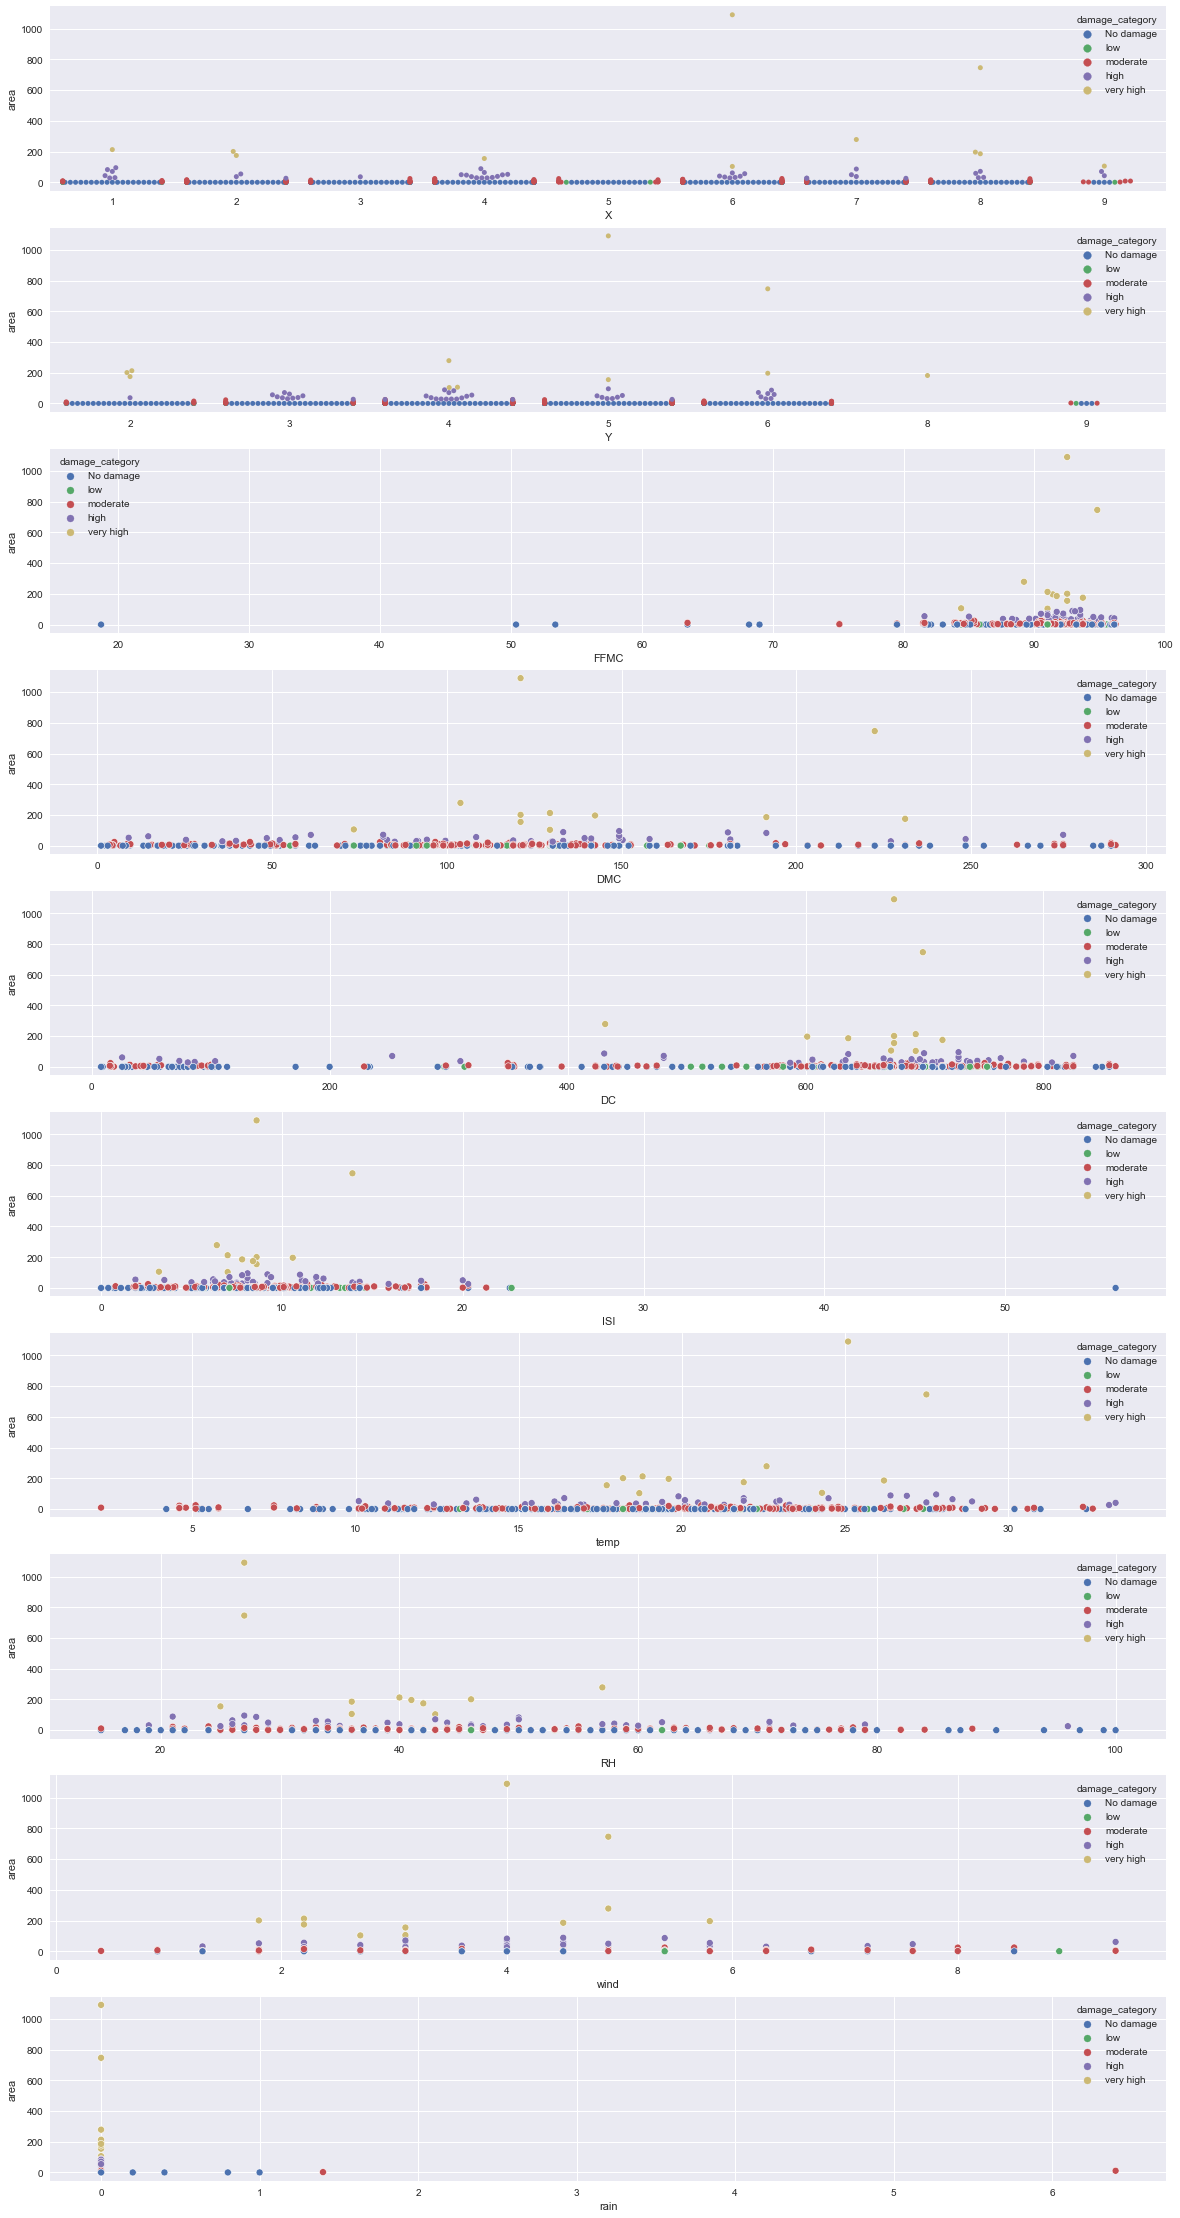

In [167]:
plt.figure(figsize=(20,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(10,1,i)
    if col in ['X','Y']:
        sns.swarmplot(data=df_forestfires,x=col,y=df_forestfires['area'],hue='damage_category')
    else:
        sns.scatterplot(data=df_forestfires,x=col,y=df_forestfires['area'],hue='damage_category')
plt.show()

In [168]:
df_forestfires

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,damage_category
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,No damage
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,No damage
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,No damage
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,No damage
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,No damage
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,moderate
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,high
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,moderate
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,No damage


In [169]:
selected_features = df_forestfires.drop(columns=['damage_category','day','month']).columns
selected_features

Index(['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain',
       'area'],
      dtype='object')

c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


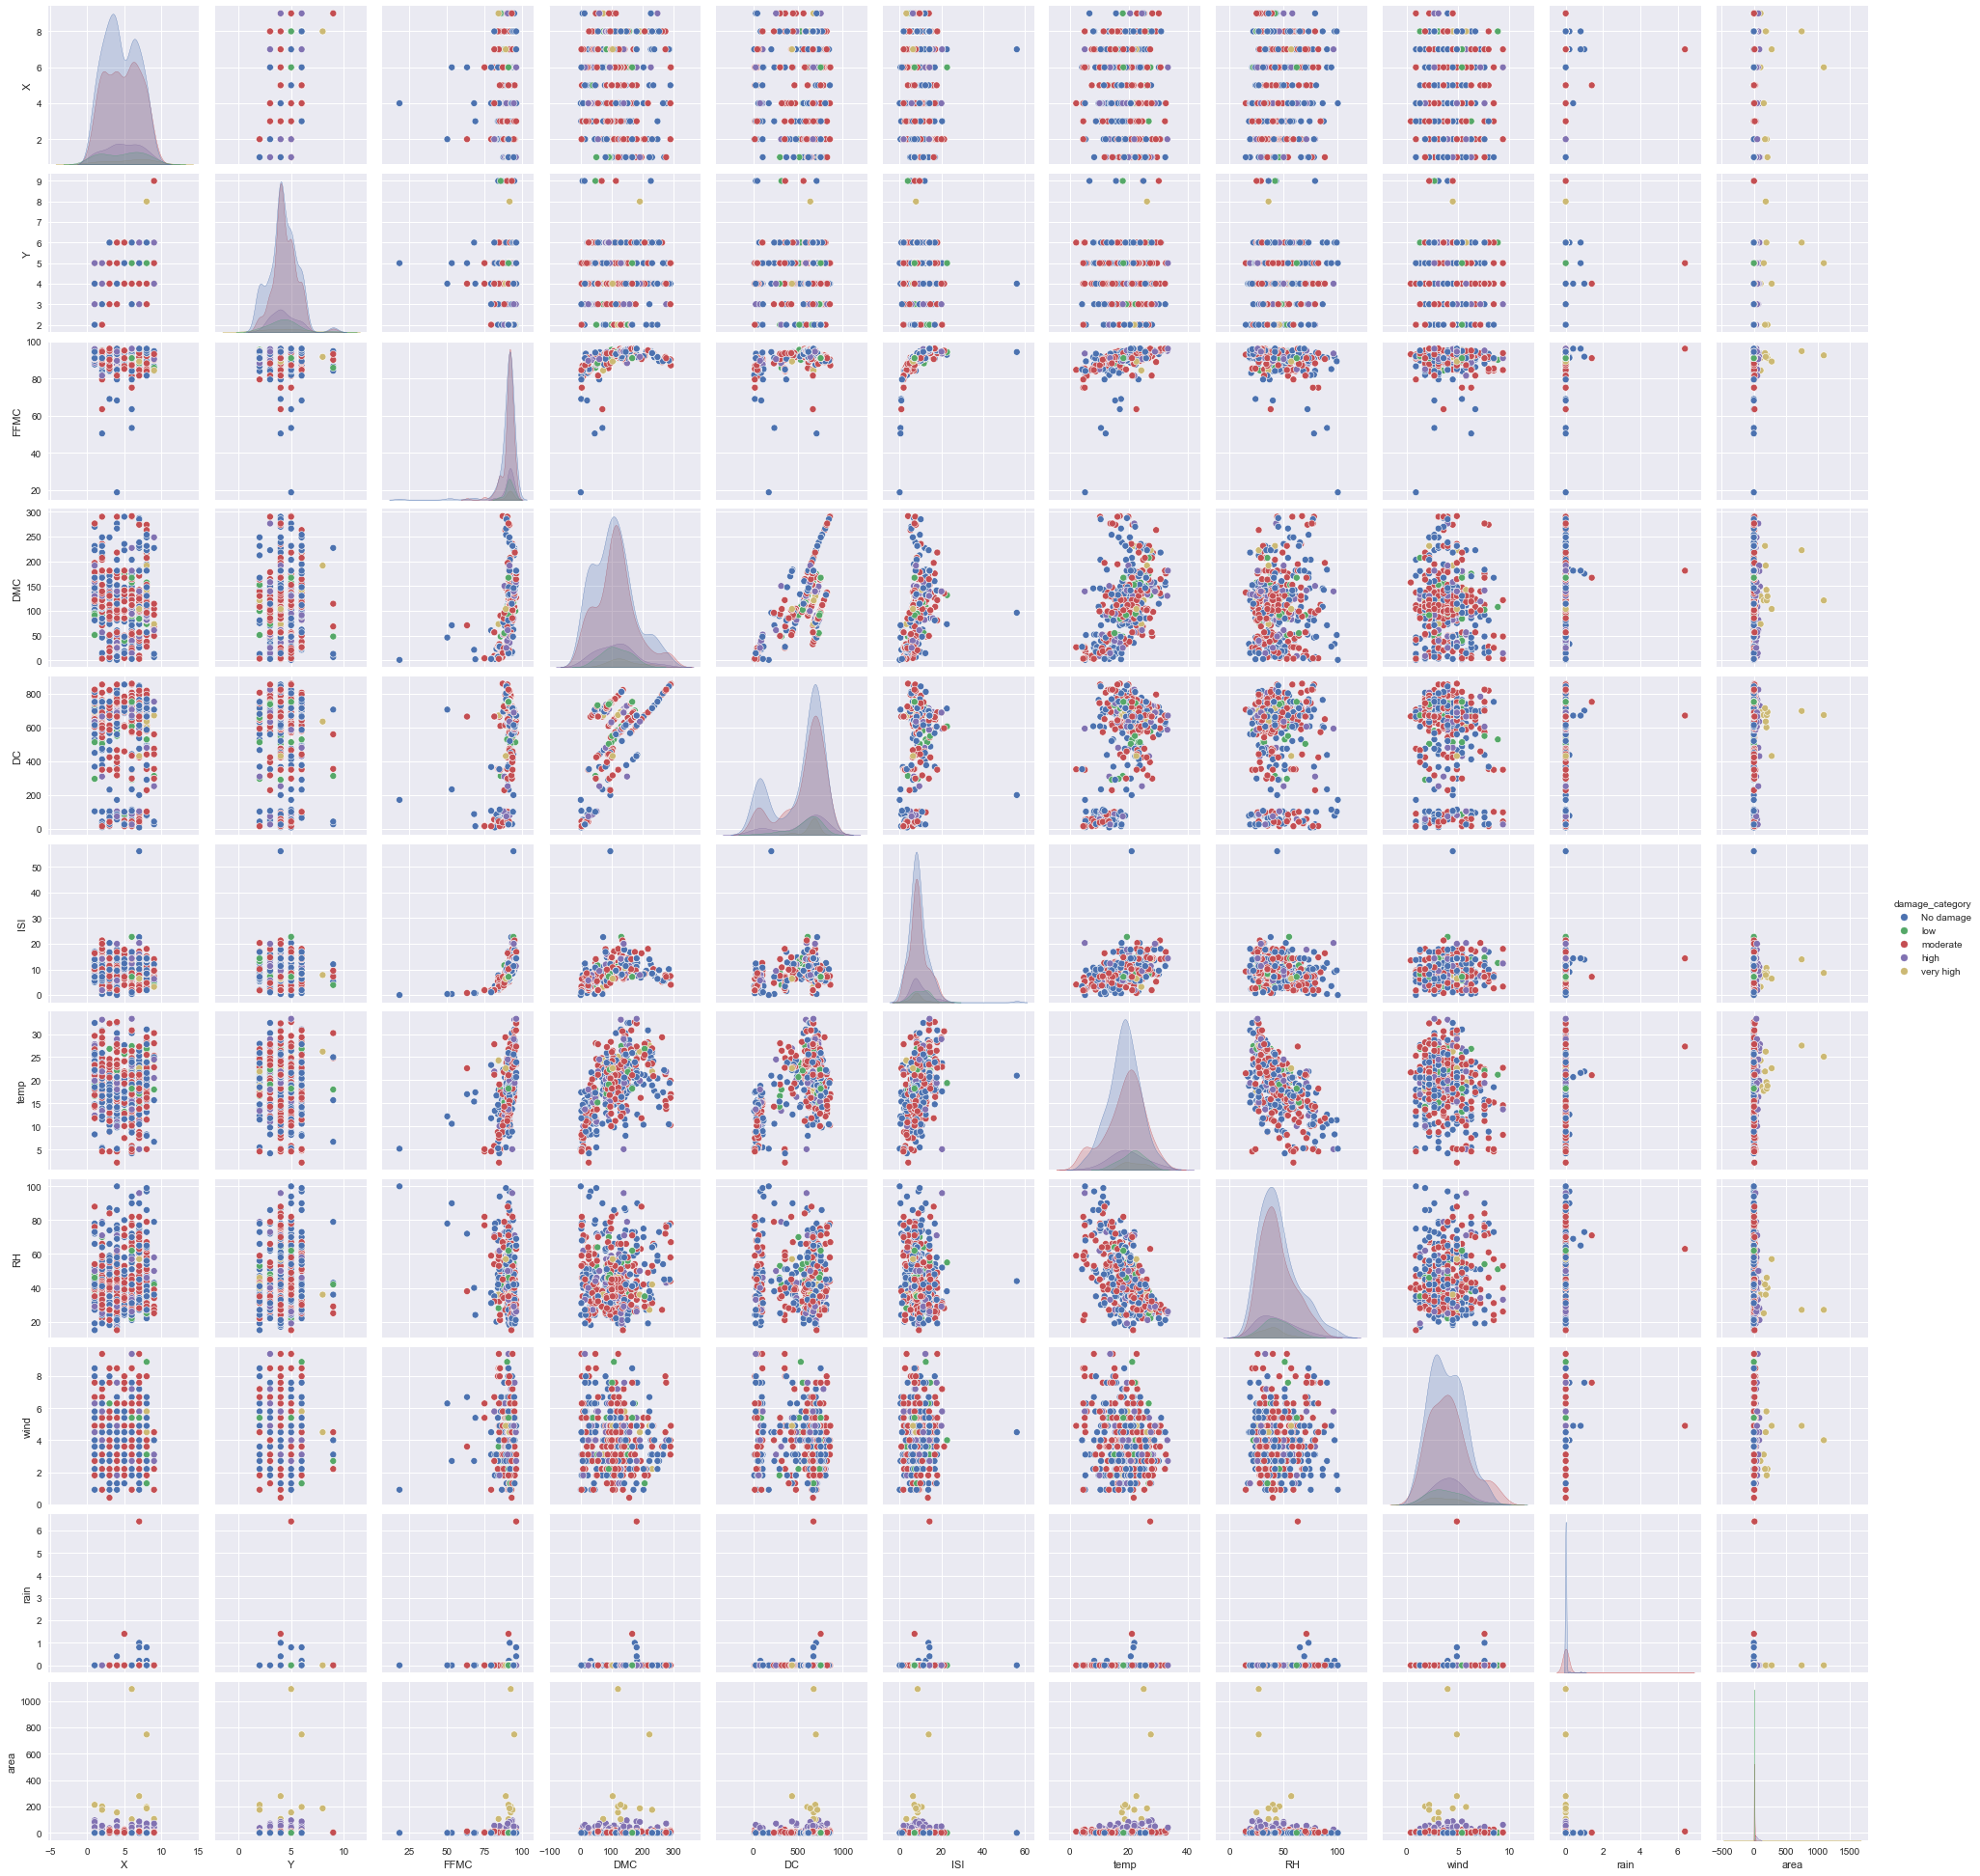

In [170]:
sns.pairplot(df_forestfires,hue='damage_category',vars=selected_features)
plt.show()

## Preprocess Data

In [171]:
out_columns = ['area','FFMC','ISI','rain']

In [172]:
df_forestfires = pd.get_dummies(df_forestfires,columns=['day','month'],drop_first=True)

In [173]:
print(df_forestfires[out_columns].describe())
np.log1p(df_forestfires[out_columns]).skew(), np.log1p(df_forestfires[out_columns]).kurtosis()

              area        FFMC         ISI        rain
count   517.000000  517.000000  517.000000  517.000000
mean     12.847292   90.644681    9.021663    0.021663
std      63.655818    5.520111    4.559477    0.295959
min       0.000000   18.700000    0.000000    0.000000
25%       0.000000   90.200000    6.500000    0.000000
50%       0.520000   91.600000    8.400000    0.000000
75%       6.570000   92.900000   10.800000    0.000000
max    1090.840000   96.200000   56.100000    6.400000


(area     1.217838
 FFMC   -11.675394
 ISI     -0.937218
 rain    14.173028
 dtype: float64,
 area      0.945668
 FFMC    185.482383
 ISI       2.584588
 rain    234.240025
 dtype: float64)

In [174]:
mask = df_forestfires.loc[:,['FFMC']].apply(zscore).abs() < 3

df_forestfires['rain'] = df_forestfires['rain'].apply(lambda x: int(x > 0.0))

df_forestfires = df_forestfires[mask.values]
df_forestfires.shape

(510, 29)

In [175]:
out_columns.remove('rain')
df_forestfires[out_columns] = np.log1p(df_forestfires[out_columns])

In [176]:
df_forestfires[out_columns].skew()

area    1.208492
FFMC   -1.803993
ISI    -0.434372
dtype: float64

In [177]:
df_forestfires['area'].values[df_forestfires['area'].values > 0] = 1
df_forestfires = df_forestfires.rename(columns={'area': 'label'})
df_forestfires

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,7,5,4.468204,26.2,94.3,1.808289,8.2,51,6.7,0,...,0,0,0,0,0,1,0,0,0,0
1,7,4,4.517431,35.4,669.1,2.041220,18.0,33,0.9,0,...,0,0,0,0,0,0,0,0,1,0
2,7,4,4.517431,43.7,686.9,2.041220,14.6,33,1.3,0,...,0,0,0,0,0,0,0,0,1,0
3,8,6,4.529368,33.3,77.5,2.302585,8.3,97,4.0,1,...,0,0,0,0,0,1,0,0,0,0
4,8,6,4.503137,51.3,102.2,2.360854,11.4,99,1.8,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,4.414010,56.7,665.6,1.064711,27.8,32,2.7,0,...,0,0,0,0,0,0,0,0,0,0
513,2,4,4.414010,56.7,665.6,1.064711,21.9,71,5.8,0,...,0,0,0,0,0,0,0,0,0,0
514,7,4,4.414010,56.7,665.6,1.064711,21.2,70,6.7,0,...,0,0,0,0,0,0,0,0,0,0
515,1,4,4.558079,146.0,614.7,2.509599,25.6,42,4.0,0,...,0,0,0,0,0,0,0,0,0,0


In [178]:
df_forestfires.corr()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
X,1.000000,0.541689,-0.090886,-0.055591,-0.088945,-0.025297,-0.053240,0.086835,0.020216,0.105892,...,-0.007217,0.044984,-0.051248,0.060086,0.126702,0.010918,0.008650,0.025230,0.089077,-0.081936
Y,0.541689,1.000000,-0.027739,0.013456,-0.095575,-0.009345,-0.018506,0.056063,-0.016625,0.072246,...,0.076705,0.003456,-0.010569,0.062855,0.075637,0.054239,-0.014962,-0.046505,0.005535,-0.101168
FFMC,-0.090886,-0.027739,1.000000,0.500947,0.471892,0.829816,0.590267,-0.266816,-0.094211,0.102803,...,-0.263373,-0.475986,-0.130093,0.016592,0.032989,-0.135178,-0.074744,-0.170413,-0.035425,0.121801
DMC,-0.055591,0.013456,0.500947,1.000000,0.680936,0.393619,0.464535,0.093093,-0.109418,0.096003,...,-0.180095,-0.317610,-0.075138,-0.005882,-0.048120,-0.409403,-0.083742,-0.075624,-0.192161,0.108845
DC,-0.088945,-0.095575,0.471892,0.680936,1.000000,0.333561,0.494497,-0.033338,-0.217087,0.015981,...,-0.108375,-0.397209,-0.097354,-0.104873,-0.181708,-0.654298,-0.116309,-0.079832,0.092697,0.530119
ISI,-0.025297,-0.009345,0.829816,0.393619,0.333561,1.000000,0.456780,-0.131547,0.068924,0.102249,...,-0.244377,-0.359551,-0.089766,0.029741,0.077765,-0.135325,-0.076959,-0.153824,-0.072973,0.002524
temp,-0.053240,-0.018506,0.590267,0.464535,0.494497,0.456780,1.000000,-0.518036,-0.237768,0.009514,...,-0.334350,-0.327163,-0.104611,0.141254,0.067234,-0.350289,-0.046662,-0.054802,-0.055924,0.083943
RH,0.086835,0.056063,-0.266816,0.093093,-0.033338,-0.131547,-0.518036,1.000000,0.079059,0.238157,...,-0.046923,0.154101,0.094387,0.017770,-0.019369,-0.079573,0.090349,-0.036202,-0.071614,-0.060491
wind,0.020216,-0.016625,-0.094211,-0.109418,-0.217087,0.068924,-0.237768,0.079059,1.000000,0.125936,...,0.272044,-0.022756,-0.022751,-0.040957,0.020922,0.179727,0.015194,0.011974,-0.054283,-0.188378
rain,0.105892,0.072246,0.102803,0.096003,0.015981,0.102249,0.009514,0.238157,0.125936,1.000000,...,-0.016920,-0.024833,-0.005595,0.032408,-0.022719,0.008720,-0.007921,-0.005595,-0.021975,-0.089264


In [179]:
df_forestfires.corr()['label'].sort_values(ascending=False)

label        1.000000
month_dec    0.126863
DC           0.085954
temp         0.063437
Y            0.063310
X            0.062641
wind         0.057710
month_sep    0.052766
DMC          0.050238
day_wed      0.044901
day_tue      0.026594
ISI          0.020479
month_aug    0.020278
month_jul    0.018164
FFMC        -0.000374
month_feb   -0.000447
month_may   -0.003450
day_mon     -0.005651
day_sat     -0.007774
month_jun   -0.009896
day_thu     -0.014215
RH          -0.018197
day_sun     -0.020881
month_jan   -0.046828
month_nov   -0.046828
month_oct   -0.067685
rain        -0.070156
month_mar   -0.115252
Name: label, dtype: float64

In [180]:
df_forestfires.dtypes

X                    int64
Y                    int64
FFMC               float64
DMC                float64
DC                 float64
ISI                float64
temp               float64
RH                   int64
wind               float64
rain                 int64
label              float64
damage_category     object
day_mon              uint8
day_sat              uint8
day_sun              uint8
day_thu              uint8
day_tue              uint8
day_wed              uint8
month_aug            uint8
month_dec            uint8
month_feb            uint8
month_jan            uint8
month_jul            uint8
month_jun            uint8
month_mar            uint8
month_may            uint8
month_nov            uint8
month_oct            uint8
month_sep            uint8
dtype: object